# Final Project dibimbing
---
Anugerah Radifan Kholis

Data taken from [kaggle](https://www.kaggle.com/mathchi/churn-for-bank-customers)

---

# Preparation

In [ ]:
import google.colab as gc

In [ ]:
gc.drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd '/content/drive/My Drive/Datasets'

/content/drive/My Drive/Datasets


In [ ]:
!ls

Age.pdf			HasCrCard.pdf
application_record.csv	healthcare-dataset-stroke-data.csv
Balance.pdf		IsActiveMember.pdf
churn.csv		logs.log
credit_record.csv	NumOfProducts.pdf
CreditScore.pdf		RowNumber.pdf
credit_test.csv		student-mat.csv
credit_train.csv	telecom_users.csv
CustomerId.pdf		Tenure.pdf
EstimatedSalary.pdf	Video_Games_Sales.csv
Exited.pdf


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Exploratory Data Analysis

## Basic Data Summary

In [ ]:
#reading the data
df = pd.read_csv('churn.csv')

In [ ]:
#checking the first five row
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#shape of the data
df.shape

(10000, 14)

In [ ]:
#feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
#checking missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
#checking unique values for every variables
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

Removing RowNumber, CustomerId, and Surname since they are specific to each customer.

In [ ]:
#dropping the mentioned columns
df = df.drop(['RowNumber','CustomerId', 'Surname'], axis = 1)

In [ ]:
#checking the first five rows of the new dataframe
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#checking variables data type
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
#descriptive statistics 
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Data Visualization

### Churned Customer Proportion

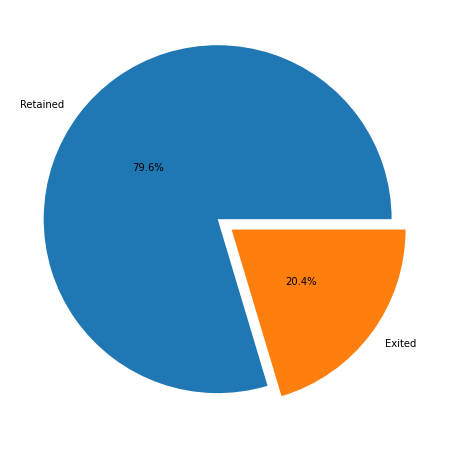

In [ ]:
pie, ax = plt.subplots(figsize=[8,8])
labels = 'Retained', 'Exited'
plt.pie(df.Exited.value_counts(), autopct="%.1f%%", explode=[0.05]*2, labels = labels, pctdistance = 0.5)
plt.show()

We can notice that our data is imbalance because the number of Retained class outnumbers Exited class by a lot with around 20% of them churned.

### Categorical Variables Relationship

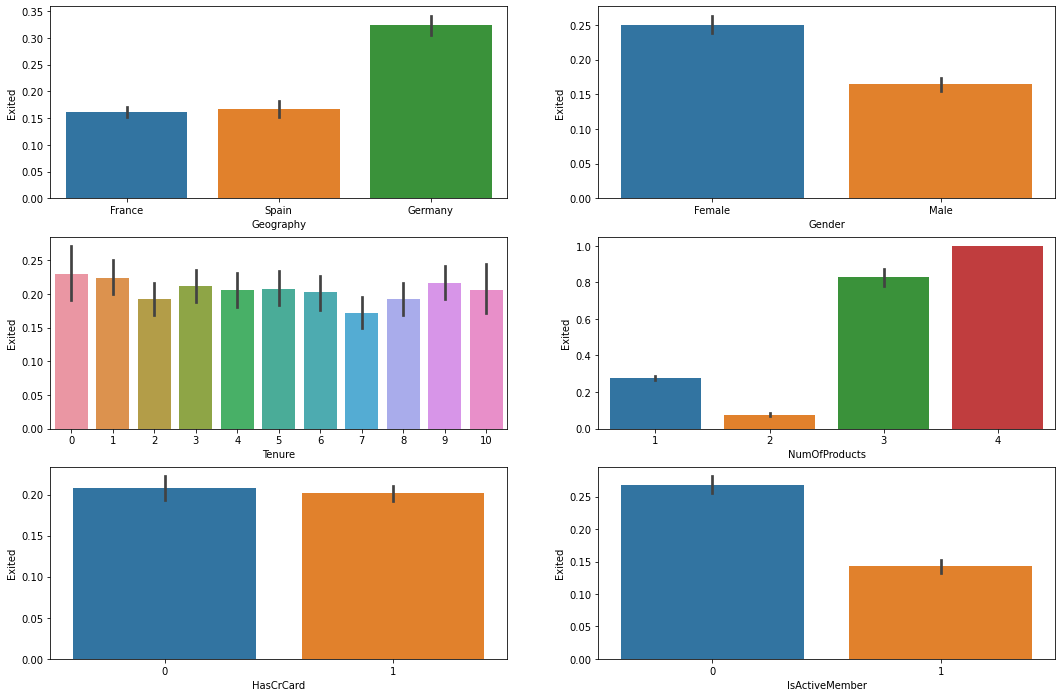

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(18, 12))
sns.barplot(x = 'Geography', y = 'Exited',data = df, ax = axs[0][0])
sns.barplot(x = 'Gender', y = 'Exited',data = df, ax = axs[0][1])
sns.barplot(x = 'Tenure', y = 'Exited',data = df, ax = axs[1][0])
sns.barplot(x = 'NumOfProducts', y = 'Exited',data = df, ax = axs[1][1])
sns.barplot(x = 'HasCrCard', y = 'Exited',data = df, ax = axs[2][0])
sns.barplot(x = 'IsActiveMember', y = 'Exited',data = df, ax = axs[2][1])

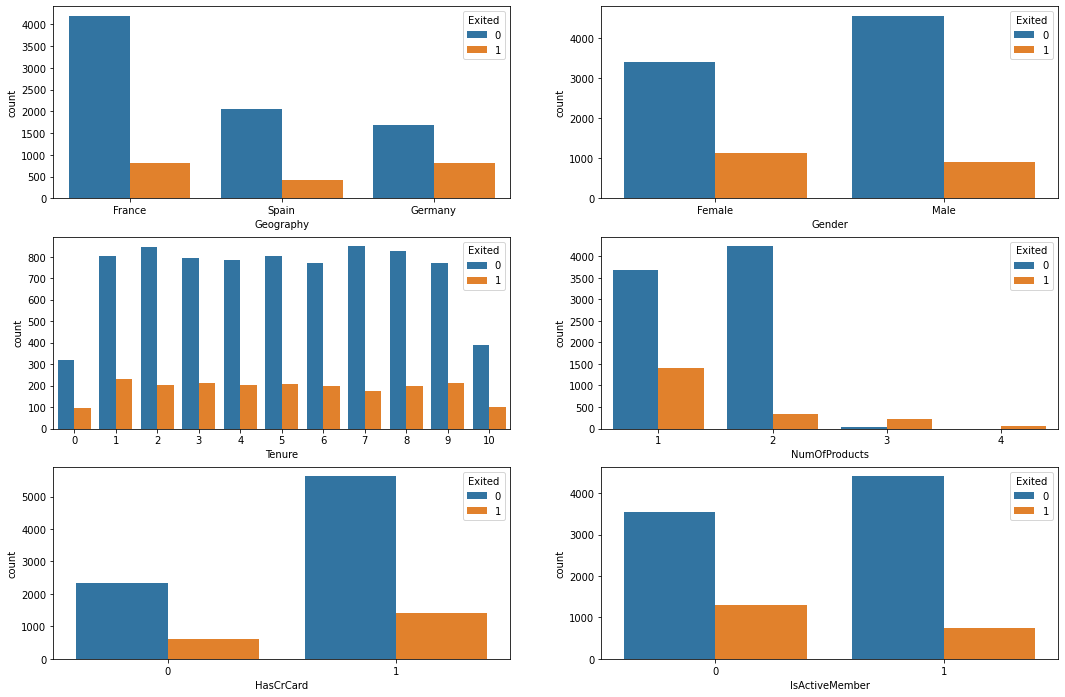

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(18, 12))
sns.countplot(x = 'Geography', hue = 'Exited',data = df, ax = axs[0][0])
sns.countplot(x = 'Gender', hue = 'Exited',data = df, ax = axs[0][1])
sns.countplot(x = 'Tenure', hue = 'Exited',data = df, ax = axs[1][0])
sns.countplot(x = 'NumOfProducts', hue = 'Exited',data = df, ax = axs[1][1])
sns.countplot(x = 'HasCrCard', hue = 'Exited',data = df, ax = axs[2][0])
sns.countplot(x = 'IsActiveMember', hue = 'Exited',data = df, ax = axs[2][1])



*   The majority of the customers is from France. However, the churning proportion is higher in Germany.
*   The proportion of female customers churning is higher than male customers.
* Customers who are more likely to churn are those who are relatively new and long time customers
* Having more than 2 products increases the likelihood to churn significantly.
* The majority of customers who churned have credit card.
* Inactive members are more likely to churn.


### Countinous Variables Relationship

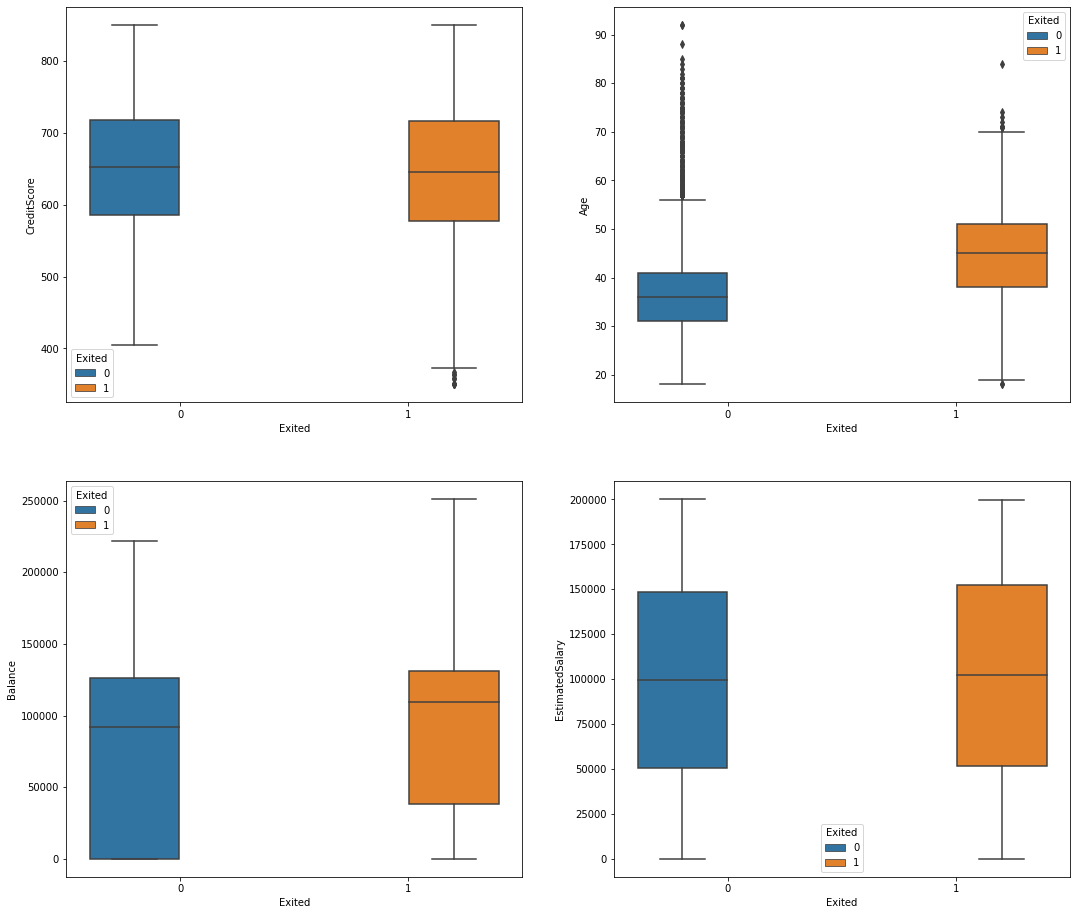

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(18, 16))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axs[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axs[0][1])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axs[1][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axs[1][1])



*   Credit score has no significant difference for customer
*   Older customer are more likely to churn
* Customers with higher bank balances are churning
* Salary has no significant difference for customer


### Data Distribution

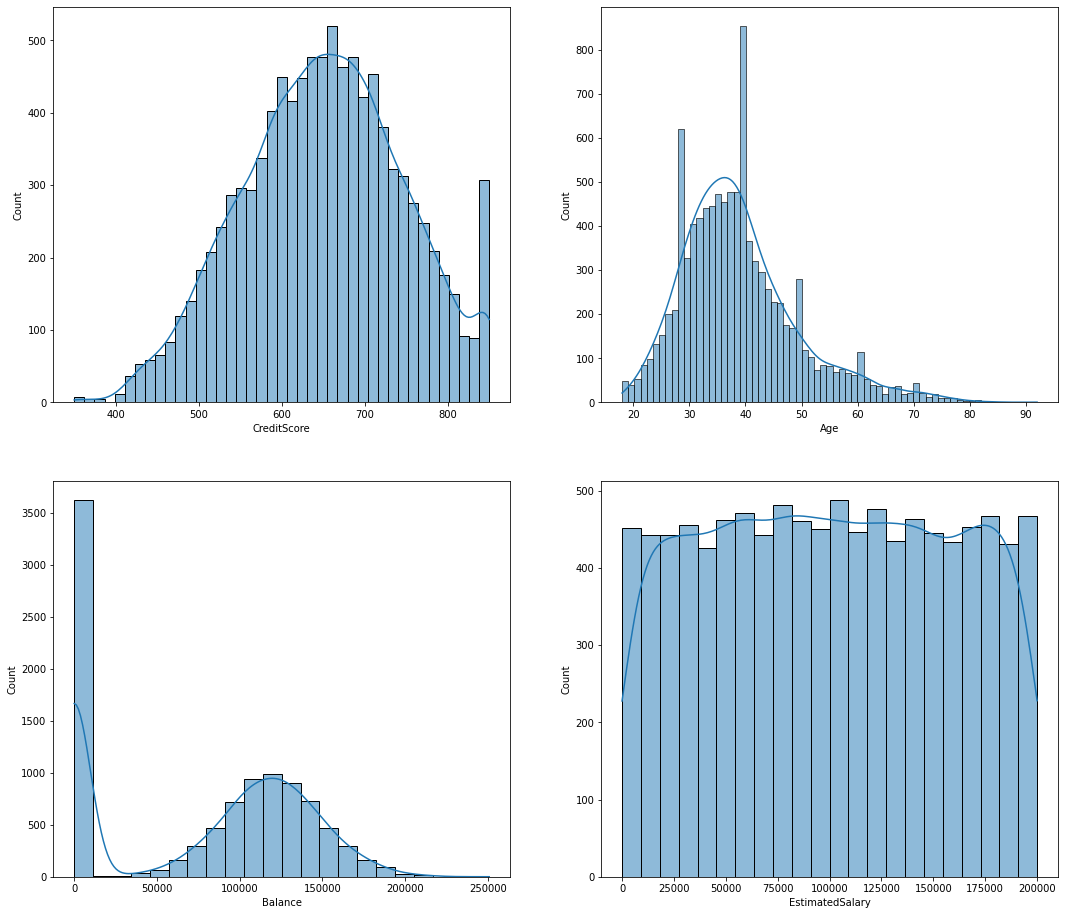

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(18, 16))
sns.histplot(df['CreditScore'],kde=True, ax=axs[0][0])
sns.histplot(df['Age'],kde=True,ax=axs[0][1])
sns.histplot(df['Balance'],kde=True, ax=axs[1][0])
sns.histplot(df['EstimatedSalary'],kde=True, ax=axs[1][1])



*   The Majority of CreditScore is above 600
*   Age is right-skewed
* Balance has normal distribution if we ignore the first bin
* EstimatedSalary is uniform  



### Correlation

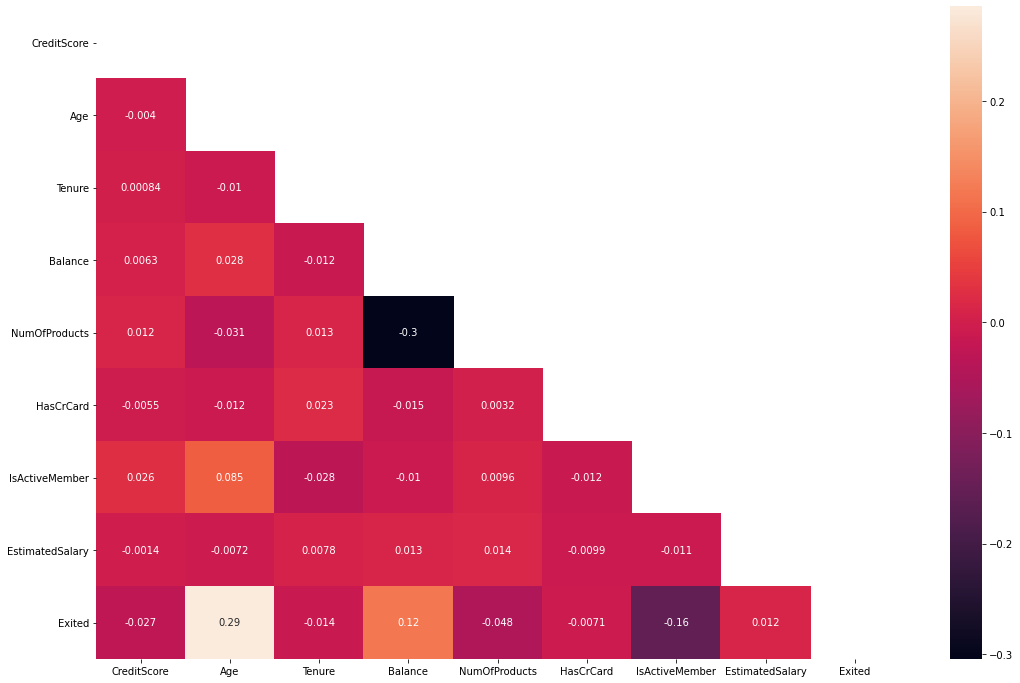

In [ ]:
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), mask = mask, annot=True)

No significant correlation between features.

# Data Preparation for Model Fitting

## Data Encoding

In [ ]:
list = ["Gender", "Geography"]
df = pd.get_dummies(df, columns =list, drop_first = True)

KeyError: ignored

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


## Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop("Exited",axis=1)
y = df["Exited"]

In [ ]:
df.shape, X.shape, y.shape

((10000, 12), (10000, 11), (10000,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=200)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Handling Imbalance Data

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
over = SMOTE(sampling_strategy='minority')
under = RandomUnderSampler(sampling_strategy='majority')

In [ ]:
X_train.shape, y_train.shape

((8000, 11), (8000,))

In [ ]:
X_train, y_train = over.fit_resample(X_train, y_train)
X_train, y_train = under.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train.shape, y_train.shape

((12780, 11), (12780,))

# Model Fitting

In [ ]:
# scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
# fitting models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

We are using recall as our performance metrics since correctly classifying customers who churned is more important for the bank.

## Logistic Regression

In [ ]:
logreg = LogisticRegression(random_state=1998)

param_grid = {'C': [0.1,0.5,1,10,50,100]}

clf_logreg = GridSearchCV(logreg, param_grid = param_grid, refit=True, scoring = 'recall',  cv = 5, n_jobs = -1)

clf_logreg_best = clf_logreg.fit(X_train, y_train)
y_pred = clf_logreg_best.predict(X_test)

In [ ]:
print('Best Parameters:')
for key, value in clf_logreg_best.best_params_.items() :
        print ('      {}: {}'.format(key, value))
print ('Confusion Matrix :')
print(confusion_matrix(y_test, y_pred))
print('Accuracy Score :',accuracy_score(y_test, y_pred) )
print('Recall Score :',recall_score(y_test, y_pred) )
print('Precision Score :',precision_score(y_test, y_pred) )
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('Report : ')
print(classification_report(y_test, y_pred))

Best Parameters:
      C: 0.1
Confusion Matrix :
[[1102  471]
 [ 125  302]]
Accuracy Score : 0.702
Recall Score : 0.7072599531615925
Precision Score : 0.3906856403622251
ROC AUC Score: 0.703916054139601
F1 Score: 0.5033333333333333
Report : 
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1573
           1       0.39      0.71      0.50       427

    accuracy                           0.70      2000
   macro avg       0.64      0.70      0.65      2000
weighted avg       0.79      0.70      0.73      2000



## KNN

In [ ]:
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(1,15), 'p': (1,2)}
     
clf_knn = GridSearchCV(knn, param_grid = param_grid, refit=True, scoring = 'recall', cv = 5, n_jobs = -1)

clf_knn_best = clf_knn.fit(X_train, y_train)
y_pred = clf_knn_best.predict(X_test)

In [ ]:
print('Best Parameters:')
for key, value in clf_knn_best.best_params_.items() :
        print ('      {}: {}'.format(key, value))
print ('Confusion Matrix :')
print(confusion_matrix(y_test, y_pred))
print('Accuracy Score :',accuracy_score(y_test, y_pred) )
print('Recall Score :',recall_score(y_test, y_pred) )
print('Precision Score :',precision_score(y_test, y_pred) )
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('Report : ')
print(classification_report(y_test, y_pred))

Best Parameters:
      n_neighbors: 1
      p: 2
Confusion Matrix :
[[1327  246]
 [ 209  218]]
Accuracy Score : 0.7725
Recall Score : 0.5105386416861827
Precision Score : 0.4698275862068966
ROC AUC Score: 0.6770747881031041
F1 Score: 0.48933782267115605
Report : 
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1573
           1       0.47      0.51      0.49       427

    accuracy                           0.77      2000
   macro avg       0.67      0.68      0.67      2000
weighted avg       0.78      0.77      0.78      2000



# Feature Engineering

In [ ]:
features_label = X.columns
forest = RandomForestClassifier (n_estimators = 10000, random_state = 0, n_jobs = -1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i], importances[indices[i]]))

 1) CreditScore                    0.281608
 2) Age                            0.162366
 3) Tenure                         0.127317
 4) Balance                        0.104895
 5) NumOfProducts                  0.100234
 6) HasCrCard                      0.091699
 7) IsActiveMember                 0.042643
 8) EstimatedSalary                0.034008
 9) Gender_Male                    0.025270
10) Geography_Germany              0.016566
11) Geography_Spain                0.013393


In [ ]:
df_fe = df.copy()
df_fe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


We are dropping features that, based on our EDA, has no impact on our modeling

In [ ]:
df_fe = df_fe.drop(['EstimatedSalary', 'HasCrCard'], axis=1)

We are adding features that are likely to affect the probability of customer churning.

In [ ]:
df_fe['TenureByAge'] = df_fe.Tenure/(df_fe.Age)

In [ ]:
df_fe['CreditScoreByAge'] = df_fe.CreditScore/(df_fe.Age)


In [ ]:
df_fe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,Exited,Gender_Male,Geography_Germany,Geography_Spain,TenureByAge,CreditScoreByAge
0,619,42,2,0.00,1,1,1,0,0,0,0.047619,14.738095
1,608,41,1,83807.86,1,1,0,0,0,1,0.024390,14.829268
2,502,42,8,159660.80,3,0,1,0,0,0,0.190476,11.952381
3,699,39,1,0.00,2,0,0,0,0,0,0.025641,17.923077
4,850,43,2,125510.82,1,1,0,0,0,1,0.046512,19.767442


In [ ]:
X = df_fe.drop("Exited",axis=1)
y = df_fe["Exited"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=200)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train, y_train = over.fit_resample(X_train, y_train)
X_train, y_train = under.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# Model Fitting

## Logistic Regression

In [ ]:
logreg = LogisticRegression(random_state=1998)

param_grid = {'C': [0.1,0.5,1,10,50,100]}

clf_logreg = GridSearchCV(logreg, param_grid = param_grid, refit=True, scoring = 'recall',  cv = 5, n_jobs = -1)

clf_logreg_best = clf_logreg.fit(X_train, y_train)
y_pred_fe = clf_logreg_best.predict(X_test)

In [ ]:
print('Best Parameters:')
for key, value in clf_logreg_best.best_params_.items() :
        print ('      {}: {}'.format(key, value))
print ('Confusion Matrix :')
print(confusion_matrix(y_test, y_pred_fe))
print('Accuracy Score :',accuracy_score(y_test, y_pred_fe) )
print('Recall Score :',recall_score(y_test, y_pred_fe) )
print('Precision Score :',precision_score(y_test, y_pred_fe) )
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_fe))
print('F1 Score:', f1_score(y_test, y_pred_fe))
print('Report : ')
print(classification_report(y_test, y_pred_fe))

Best Parameters:
      C: 10
Confusion Matrix :
[[1073  500]
 [ 121  306]]
Accuracy Score : 0.6895
Recall Score : 0.7166276346604216
Precision Score : 0.37965260545905705
ROC AUC Score: 0.6993818402164155
F1 Score: 0.49635036496350365
Report : 
              precision    recall  f1-score   support

           0       0.90      0.68      0.78      1573
           1       0.38      0.72      0.50       427

    accuracy                           0.69      2000
   macro avg       0.64      0.70      0.64      2000
weighted avg       0.79      0.69      0.72      2000



## KNN

In [ ]:
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(1,15), 'p': (1,2)}
     
clf_knn = GridSearchCV(knn, param_grid = param_grid, refit=True, scoring = 'recall', cv = 5, n_jobs = -1)

clf_knn_best = clf_knn.fit(X_train, y_train)
y_pred = clf_knn_best.predict(X_test)

In [ ]:
print('Best Parameters:')
for key, value in clf_knn_best.best_params_.items() :
        print ('      {}: {}'.format(key, value))
print ('Confusion Matrix :')
print(confusion_matrix(y_test, y_pred))
print('Accuracy Score :',accuracy_score(y_test, y_pred) )
print('Recall Score :',recall_score(y_test, y_pred) )
print('Precision Score :',precision_score(y_test, y_pred) )
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('Report : ')
print(classification_report(y_test, y_pred))

Best Parameters:
      n_neighbors: 1
      p: 2
Confusion Matrix :
[[1314  259]
 [ 186  241]]
Accuracy Score : 0.7775
Recall Score : 0.5644028103044496
Precision Score : 0.482
ROC AUC Score: 0.6998746410072788
F1 Score: 0.5199568500539373
Report : 
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1573
           1       0.48      0.56      0.52       427

    accuracy                           0.78      2000
   macro avg       0.68      0.70      0.69      2000
weighted avg       0.79      0.78      0.78      2000

